# Exploratory data analysis on raw dataset

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes
import geopandas as gpd
import utils.constants as c

In [14]:
df_complete_dataset = pd.read_csv(
    "../data/raw/complete_dataset.csv", index_col="datetime", parse_dates=["datetime"]
)
df_station_metadata = pd.read_csv(
    "../data/raw/station_metadata.csv", index_col="id", dtype={"id": str}
)

## Basic information of dataset

In [15]:
df_complete_dataset.describe()

,air_pressure_00183,air_pressure_00591,air_pressure_01694,air_pressure_01759,air_pressure_02429,air_pressure_03032,air_pressure_03897,air_pressure_04271,air_pressure_04393,air_pressure_04625,...,wind_speed_02429,wind_speed_03032,wind_speed_03897,wind_speed_04271,wind_speed_04393,wind_speed_04625,wind_speed_05516,wind_speed_05930,wind_speed_06097,wind_speed_06163
count,646390.000000,647567.000000,646940.000000,646596.000000,646569.000000,647828.000000,644838.000000,646965.000000,644278.000000,645529.000000,...,646116.000000,625923.000000,644709.000000,646818.000000,646808.000000,626637.000000,646300.000000,645899.000000,645191.000000,641381.00000
mean,1009.523177,1009.646692,1007.811548,1013.319056,1011.701021,1010.489605,1014.466160,1013.287425,1013.103056,1007.696643,...,2.875768,7.291083,4.458936,4.749276,6.376374,3.757703,6.229281,5.312629,5.985946,3.72842
std,9.993332,9.718621,9.640353,9.836928,10.102238,10.705811,10.013251,9.917489,10.379852,9.753225,...,1.729842,3.317566,2.446474,2.753203,3.279116,1.979364,3.280061,2.871333,3.636614,2.15345
min,963.300000,962.500000,960.000000,966.800000,968.700000,964.200000,969.700000,968.900000,970.100000,960.200000,...,0.000000,0.100000,0.000000,0.100000,0.000000,0.100000,0.000000,0.000000,0.100000,0.00000
25%,1003.500000,1003.800000,1001.900000,1007.400000,1005.600000,1004.100000,1008.400000,1007.300000,1006.800000,1001.800000,...,1.500000,4.800000,2.600000,2.800000,3.900000,2.300000,3.700000,3.200000,3.200000,2.10000
50%,1010.100000,1010.200000,1008.400000,1013.800000,1012.400000,1011.300000,1015.100000,1013.800000,1013.800000,1008.300000,...,2.600000,6.900000,4.000000,4.100000,5.800000,3.400000,5.700000,4.800000,5.000000,3.40000
75%,1016.100000,1015.900000,1014.000000,1019.800000,1018.300000,1017.600000,1020.900000,1019.700000,1019.900000,1014.000000,...,3.900000,9.400000,5.800000,6.000000,8.300000,4.800000,8.200000,6.900000,8.200000,5.00000
max,1043.500000,1042.200000,1040.100000,1046.500000,1045.300000,1046.200000,1048.200000,1046.700000,1047.400000,1040.400000,...,16.600000,30.700000,20.200000,26.800000,32.800000,18.400000,27.600000,27.200000,27.800000,19.00000


In [16]:
df_complete_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 648145 entries, 2011-09-04 00:00:00 to 2023-12-31 00:00:00
Data columns (total 82 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   air_pressure_00183       646390 non-null  float64
 1   air_pressure_00591       647567 non-null  float64
 2   air_pressure_01694       646940 non-null  float64
 3   air_pressure_01759       646596 non-null  float64
 4   air_pressure_02429       646569 non-null  float64
 5   air_pressure_03032       647828 non-null  float64
 6   air_pressure_03897       644838 non-null  float64
 7   air_pressure_04271       646965 non-null  float64
 8   air_pressure_04393       644278 non-null  float64
 9   air_pressure_04625       645529 non-null  float64
 10  air_pressure_05516       647497 non-null  float64
 11  air_pressure_05930       645991 non-null  float64
 12  air_pressure_06163       643027 non-null  float64
 13  air_temperature_00183    

## Missing values

Count missing total missing values

In [17]:
total_number_of_values = df_complete_dataset.size
total_number_of_missing_values = df_complete_dataset.isna().sum().sum()
percentage_of_missing_values = (
    total_number_of_missing_values / total_number_of_values
) * 100

print(f"Total number of values: {total_number_of_values}")
print(f"Total number of missing values: {total_number_of_missing_values}")
print(f"Percentage of missing values: {percentage_of_missing_values}")

Total number of values: 53147890
Total number of missing values: 265472
Percentage of missing values: 0.49949678152792143


Count missing values per column

In [18]:
number_of_missing_values_per_column = df_complete_dataset.isna().sum()
percentage_of_missing_values_per_column = (
    number_of_missing_values_per_column / len(df_complete_dataset)
) * 100

missing_values_per_column_stats = pd.DataFrame(
    {
        "Missing Count": number_of_missing_values_per_column,
        "Missing Percent": percentage_of_missing_values_per_column,
    }
)

print("Missing values for each column (10 columns with the highest ratio of missing values):")
print(missing_values_per_column_stats.sort_values(by="Missing Percent", ascending=False)[:10])

Missing values for each column (10 columns with the highest ratio of missing values):
                         Missing Count  Missing Percent
wind_speed_03032                 22222         3.428554
wind_direction_03032             22222         3.428554
wind_direction_04625             21508         3.318393
wind_speed_04625                 21508         3.318393
wind_speed_01759                  8120         1.252806
wind_direction_01759              8120         1.252806
wind_speed_06163                  6764         1.043594
wind_direction_06163              6764         1.043594
dew_point_06163                   5172         0.797970
relative_humidity_06163           5167         0.797198


Count missing values per station

In [19]:
missing_values_per_station_stats = {}

for col in df_complete_dataset.columns:
    station_id = col.split("_")[-1]
    missing_values_per_station_stats.setdefault(
        station_id, {"Missing Count": 0, "Missing Percent": 0}
    )

    num_missing_values = df_complete_dataset[col].isna().sum()
    missing_values_per_station_stats[station_id][
        "Missing Count"
    ] += num_missing_values

number_of_columns_per_station = len(missing_values_per_station_stats)
number_of_values_per_station = total_number_of_values / number_of_columns_per_station

for station_id in missing_values_per_station_stats.keys():
    num_missing_values = missing_values_per_station_stats[station_id][
        "Missing Count"
    ]
    missing_values_per_station_stats[station_id]["Missing Percent"] = (
        num_missing_values / number_of_values_per_station
    ) * 100

missing_values_per_station_stats_df = pd.DataFrame(
    missing_values_per_station_stats
).transpose()

print("Missing values for each station:")
print(
    missing_values_per_station_stats_df.sort_values(
        by="Missing Percent", ascending=False
    )
)

Missing values for each station:
       Missing Count  Missing Percent
04625        53527.0         1.510700
03032        45970.0         1.297417
06163        34094.0         0.962240
01759        21879.0         0.617494
03897        19210.0         0.542166
00183        14835.0         0.418690
05930        13773.0         0.388717
02429        10009.0         0.282485
01694         9904.0         0.279522
04393         9817.0         0.277067
00591         8337.0         0.235296
04271         7685.0         0.216895
05516         7654.0         0.216020
06097         5908.0         0.166742
00788         2870.0         0.081000


Check missing values for the reference station

In [20]:
print("Missing Values for reference station:")
print(missing_values_per_column_stats.loc[missing_values_per_column_stats.index.str.contains("03897")])


Missing Values for reference station:
                         Missing Count  Missing Percent
air_pressure_03897                3307         0.510225
air_temperature_03897             2479         0.382476
dew_point_03897                   3346         0.516243
relative_humidity_03897           3338         0.515008
wind_direction_03897              3304         0.509762
wind_speed_03897                  3436         0.530128


Check for skipped timestamps


In [21]:
expected_freq = pd.date_range(start=df_complete_dataset.index.min(), end=df_complete_dataset.index.max(), freq="10T")
missing_timestamps = expected_freq.difference(df_complete_dataset.index)
print(f"Number of missing timestamps: {len(missing_timestamps)}")

Number of missing timestamps: 0


/var/folders/vq/5vq5mqh149q3d8z9433vvps40000gn/T/ipykernel_5197/2031939586.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  expected_freq = pd.date_range(start=df_complete_dataset.index.min(), end=df_complete_dataset.index.max(), freq="10T")


## Explore reference station

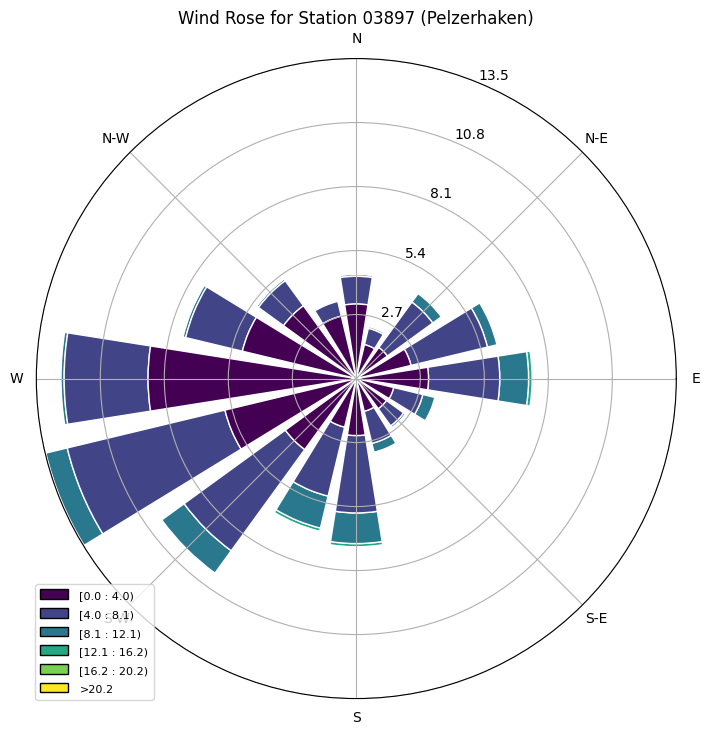

In [22]:

reference_wind_direction_column = f"wind_direction_{c.REFERENCE_STATION_ID}"
reference_wind_speed_column = f"wind_speed_{c.REFERENCE_STATION_ID}"

df_reference_wind = df_complete_dataset[
    [reference_wind_direction_column, reference_wind_speed_column]
].dropna()

station_name = df_station_metadata.loc[c.REFERENCE_STATION_ID, "name"]

wind_rose_fig = plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax(fig=wind_rose_fig)
ax.bar(
    df_reference_wind[reference_wind_direction_column],
    df_reference_wind[reference_wind_speed_column],
    normed=True,
    opening=0.8,
    edgecolor="white",
)

ax.set_legend()

plt.title(f"Wind Rose for Station {c.REFERENCE_STATION_ID} ({station_name})")
plt.show()

## Visualize station locations

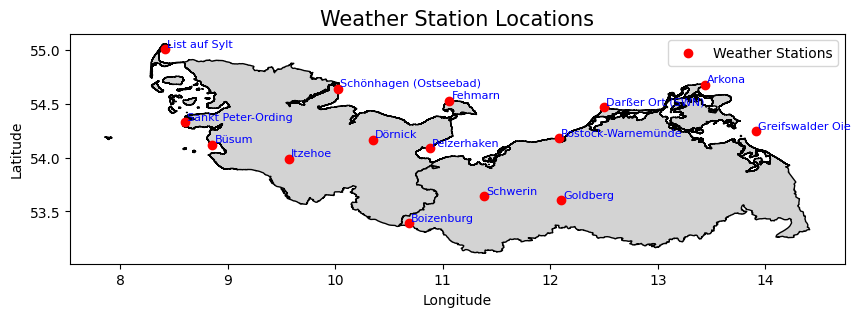

In [23]:
gdf_stations = gpd.GeoDataFrame(
    df_station_metadata,
    geometry=gpd.GeoSeries.from_xy(
        df_station_metadata.geographic_longitude,
        df_station_metadata.geographic_latitude,
    ),
)

germany = gpd.read_file("shape_files/gadm41_DEU_shp/gadm41_DEU_1.shp")
schleswig_holstein = germany[germany.NAME_1 == "Schleswig-Holstein"]
meck_pom = germany[germany.NAME_1 == "Mecklenburg-Vorpommern"]

fig, ax = plt.subplots(figsize=(10, 10))

schleswig_holstein.plot(ax=ax, color="lightgray", edgecolor="black")
meck_pom.plot(ax=ax, color="lightgray", edgecolor="black")


gdf_stations.plot(ax=ax, color="red", marker="o", label="Weather Stations")

for x, y, label in zip(
    gdf_stations.geometry.x, gdf_stations.geometry.y, gdf_stations["name"]
):
    ax.text(x + 0.02, y + 0.02, label, fontsize=8, ha="left", color="blue")

ax.set_title("Weather Station Locations", fontsize=15)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.legend()
plt.show()